# Xarray

"Python package that makes working with labelled multi-dimensional arrays simple, efficient, and fun!". It's like pandas but for netCDF.

[xarray website](http://xarray.pydata.org/en/stable/)

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import xarray 
import pandas as pd
import numpy as np
from matplotlib import cm
# import seaborn as sns

Open netCDF file with several variables inside:

In [2]:
f = xarray.open_dataset('./air.2m.gauss.2016.nc')

In [3]:
f

<xarray.Dataset>
Dimensions:    (lat: 94, lon: 192, nbnds: 2, time: 366)
Coordinates:
  * lat        (lat) float32 88.542 86.6531 84.7532 ... -86.6531 -88.542
  * lon        (lon) float32 0.0 1.875 3.75 5.625 ... 354.375 356.25 358.125
  * time       (time) datetime64[ns] 2016-01-01 2016-01-02 ... 2016-12-31
Dimensions without coordinates: nbnds
Data variables:
    air        (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) float64 ...
Attributes:
    Conventions:    COARDS
    title:          mean daily NMC reanalysis (2014)
    history:        created 2013/12 by Hoop (netCDF2.3)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

Mean over time

In [4]:
f.air

<xarray.DataArray 'air' (time: 366, lat: 94, lon: 192)>
[6605568 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.542 86.6531 84.7532 ... -84.7532 -86.6531 -88.542
  * lon      (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.375 356.25 358.125
  * time     (time) datetime64[ns] 2016-01-01 2016-01-02 ... 2016-12-31
Attributes:
    long_name:     mean Daily Air temperature at 2 m
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NCEP Reanalysis Daily Averages
    level_desc:    2 m
    statistic:     Mean
    parent_stat:   Individual Obs
    valid_range:   [150. 400.]
    actual_range:  [177.75    317.90002]

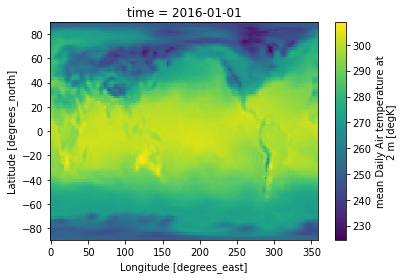

In [5]:
f.air[0,:,:].plot()

In [6]:
import matplotlib.pylab as plt
import cartopy.crs as ccrs

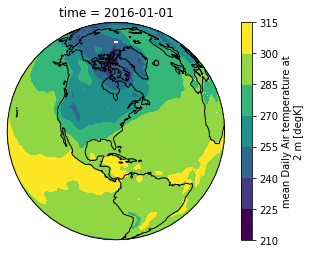

In [7]:
ax = plt.axes(projection=ccrs.Orthographic(-80, 35))
f.air.isel(time=0).plot.contourf(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines()

http://xarray.pydata.org/en/stable/plotting.html

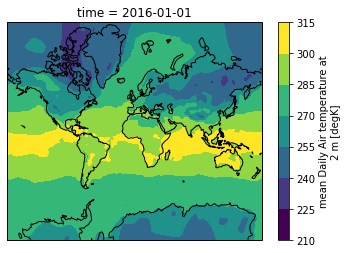

In [8]:
ax = plt.axes(projection=ccrs.Mercator())
f.air.isel(time=0).plot.contourf(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines()

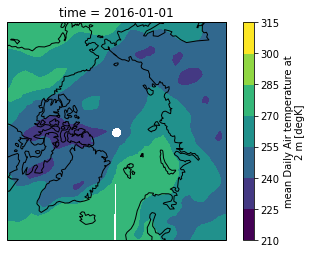

In [9]:
ax = plt.axes(projection=ccrs.NorthPolarStereo())
f.air.isel(time=0).plot.contourf(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())

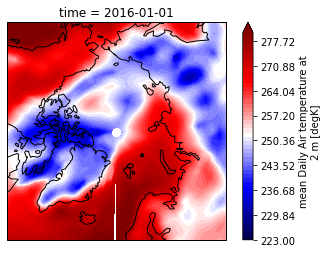

In [10]:
ax = plt.axes(projection=ccrs.NorthPolarStereo())
f.air.isel(time=0).plot.contourf(levels = np.linspace(223,280,51),
                                  cmap=cm.seismic,
                                  ax=ax,
                                  transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())

In [11]:
air_mean = f.air.mean(dim='time')-273.15

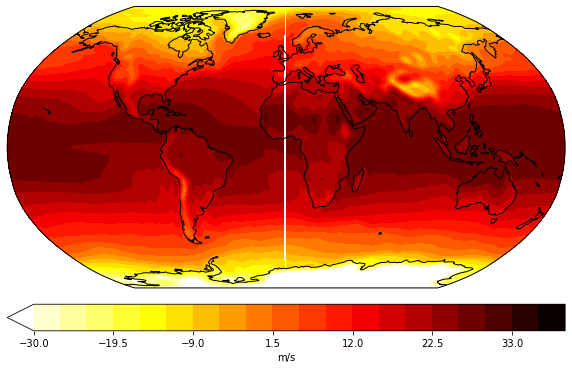

In [12]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Robinson())
air_mean.plot.contourf(ax=ax, 
                            transform=ccrs.PlateCarree(),
                            cbar_kwargs={'orientation':'horizontal', 'pad':0.03, 'label':'m/s'},
                            levels = np.linspace(-30,40,21),
                            cmap = cm.hot_r
                            )
ax.coastlines()

In [13]:
f.air

<xarray.DataArray 'air' (time: 366, lat: 94, lon: 192)>
array([[[248.475  , 248.45   , ..., 248.475  , 248.475  ],
        [250.25   , 250.70001, ..., 249.575  , 249.90001],
        ...,
        [250.75   , 250.825  , ..., 250.65   , 250.70001],
        [252.475  , 252.375  , ..., 252.65   , 252.55002]],

       [[246.75   , 246.90001, ..., 246.575  , 246.67499],
        [242.65001, 243.025  , ..., 242.075  , 242.34999],
        ...,
        [251.125  , 251.02501, ..., 251.22499, 251.175  ],
        [252.92499, 252.825  , ..., 253.17502, 253.05   ]],

       ...,

       [[241.775  , 241.65   , ..., 242.05   , 241.92499],
        [246.675  , 246.775  , ..., 246.425  , 246.57501],
        ...,
        [251.75   , 251.875  , ..., 251.67499, 251.725  ],
        [250.825  , 250.8    , ..., 250.875  , 250.825  ]],

       [[244.04999, 243.875  , ..., 244.3    , 244.175  ],
        [244.3    , 244.325  , ..., 244.25   , 244.25   ],
        ...,
        [255.05   , 255.025  , ..., 255.05   , 255.05   ],
        [253.275  , 253.225  , ..., 253.375  , 253.275  ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.542 86.6531 84.7532 ... -84.7532 -86.6531 -88.542
  * lon      (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.375 356.25 358.125
  * time     (time) datetime64[ns] 2016-01-01 2016-01-02 ... 2016-12-31
Attributes:
    long_name:     mean Daily Air temperature at 2 m
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NCEP Reanalysis Daily Averages
    level_desc:    2 m
    statistic:     Mean
    parent_stat:   Individual Obs
    valid_range:   [150. 400.]
    actual_range:  [177.75    317.90002]

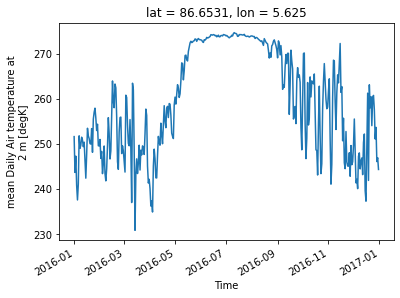

In [14]:
f.air.sel(lon=5, lat=87, method='nearest', tolerance=5).plot()

In [15]:
point = f.air.sel(lon=5, lat=87, method='nearest', tolerance=5)
point.to_netcdf('./point.nc')